In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

array([0], dtype=uint8)

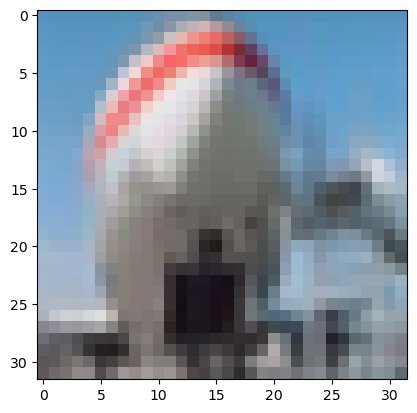

In [45]:
(x,y),(xt,yt) = keras.datasets.cifar10.load_data()
from matplotlib import pyplot as plt
plt.imshow(x[189])
y[189]

In [58]:
x.shape


(50000, 32, 32, 3)

In [99]:
model = keras.Sequential()
model.add(layers.Conv2D(filters = 100 ,kernel_size = (2,2),activation = 'relu',input_shape = (32,32,3,)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters = 200 ,kernel_size = (2,2),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(keras.layers.Dense(100,activation = 'relu'))
# model.add(keras.layers.Dense(30,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x,y,epochs =10)


Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 2.0236 - accuracy: 0.4226
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2652 - accuracy: 0.5506
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0794 - accuracy: 0.6246
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9401 - accuracy: 0.6745
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8310 - accuracy: 0.7127
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7315 - accuracy: 0.7459
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6508 - accuracy: 0.7742
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5717 - accuracy: 0.8026
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4975 - accuracy: 0.8279
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [101]:
from sklearn.metrics import confusion_matrix , accuracy_score,classification_report
import numpy as  np
pred = model.predict(xt)
pred = [np.argmax(i) for i in pred]
confusion_matrix(yt,pred)

313/313 [==============================] - 3s 10ms/step


array([[792,  23,  38,  27,  14,   4,  14,  11,  52,  25],
       [ 46, 778,   4,  16,   3,   3,   7,   6,  30, 107],
       [ 90,   6, 543,  79,  75,  41,  90,  42,  21,  13],
       [ 60,  10,  80, 510,  52, 110,  83,  39,  30,  26],
       [ 47,   8, 113, 107, 516,  21, 108,  60,  10,  10],
       [ 33,  10,  84, 244,  43, 431,  51,  70,  17,  17],
       [ 11,   9,  51,  89,  24,   9, 788,   6,   9,   4],
       [ 37,   9,  35,  72,  67,  45,  25, 672,  10,  28],
       [138,  38,  14,  28,   3,   4,   2,   4, 737,  32],
       [ 55, 106,  10,  24,  10,   1,  17,  13,  36, 728]])

In [102]:
accuracy_score(yt,pred)

0.6495

In [103]:
# classification_report(yt,pred)